## Dashboard

- Import data and Data Exploratory
- Run Recommendation Models
- 

### Import Data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
df = pd.read_csv('data/Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# check data type and numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
# check for NA items
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

### Exploratory Data Analysis (EDA)

Text(0.5,1,'ProductId histogram')

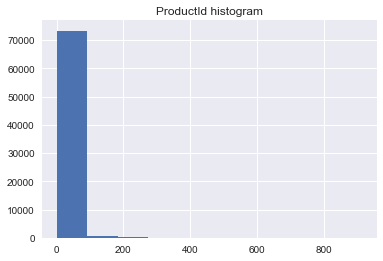

In [6]:
# Check same value counts how many times
# Check ProductId, UserId
df.ProductId.value_counts().T.hist()

plt.title('ProductId histogram')

Text(0.5,1,'UserId histogram')

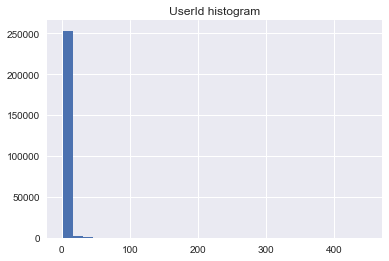

In [7]:
plt.figure()
ax = df.UserId.value_counts().T.hist(bins=30)
plt.title('UserId histogram')
#ax.set_xlim([0,60])

D:\Users\ThinkPad\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


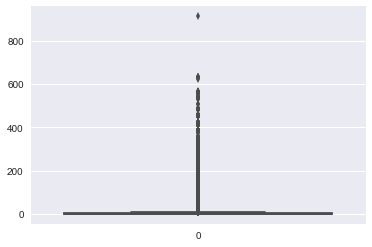

In [8]:
import seaborn as sns
sns.boxplot(data=df.ProductId.value_counts().T) # check for boxplot

In [9]:
df.UserId.value_counts().describe() # Most of the users just buy once, same for ProductId

count    256059.000000
mean          2.220012
std           4.443361
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         448.000000
Name: UserId, dtype: float64

### Feature Engineering

We mainly focus in two tasks:
- Drop products and users frequency lower than 10 times --> computional efficiency, data representativeness
- Manually create two columns `#Products` Number of ProductId frequency and `#Users` Number of Users frequency
- Convert Time back to pandas.datatime type

In [14]:
# filter conditions: No. Products > 10, No. Users > 10
def data_clean(df, feature, m):
    count = df[feature].value_counts()
    df = df[df[feature].isin(count[count > m].index)]
    return df 
def data_clean_sum(df,features,m):
    fil = df.ProductId.value_counts()
    fil2 = df.UserId.value_counts()
    df['#Proudcts'] = df.ProductId.apply(lambda x: fil[x])
    df['#Users'] = df.UserId.apply(lambda x: fil2[x])
    while (df.ProductId.value_counts(ascending=True)[0]) < m or \
    (df.UserId.value_counts(ascending=True)[0] < m):
        df = data_clean(df,features[0],m)
        df = data_clean(df,features[1],m)
    return df
df['datetime'] = pd.to_datetime(df.Time, unit='s')
output = data_clean_sum(df,['ProductId', 'UserId'],10)    
# check if it is correct 
output.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,#Proudcts,#Users
count,64340.000000,64340.000000,64340.000000,64340.000000,6.434000e+04,64340.000000,64340.000000
mean,277181.438887,1.429437,1.973376,4.088592,1.295185e+09,199.157927,33.280712
std,160812.549416,5.869399,6.673974,1.230218,4.648356e+07,130.611822,42.327854
min,423.000000,0.000000,0.000000,1.000000,1.084666e+09,13.000000,11.000000
25%,136046.500000,0.000000,0.000000,3.000000,1.265760e+09,103.000000,14.000000
50%,275571.500000,0.000000,1.000000,5.000000,1.310774e+09,171.000000,21.000000
75%,412090.250000,1.000000,2.000000,5.000000,1.332547e+09,269.000000,33.000000
max,568063.000000,413.000000,416.000000,5.000000,1.351210e+09,913.000000,448.000000


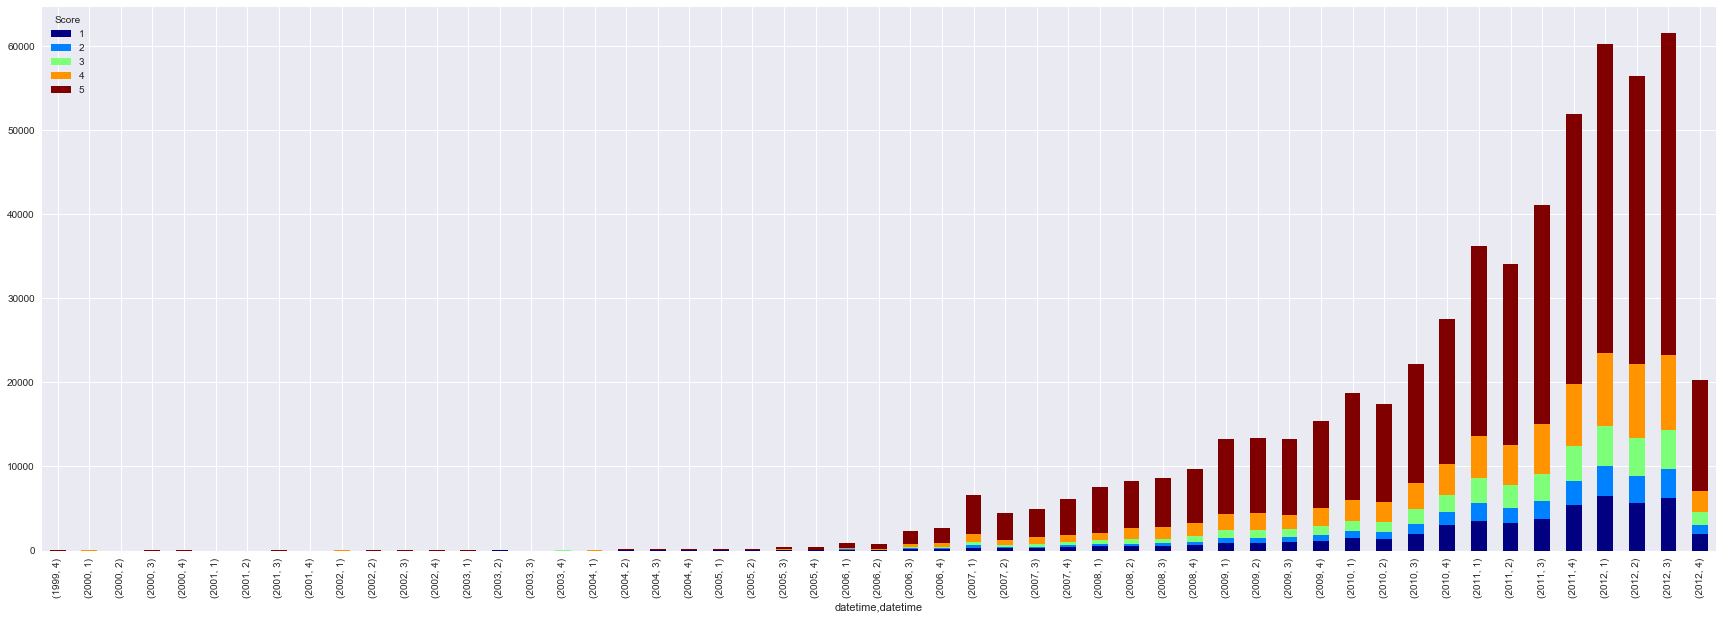

In [15]:
# Plot graph to see how item evlove with time
df_grp = df.groupby([df.datetime.dt.year, df.datetime.dt.quarter, df.Score]).count()['ProductId'].unstack()

df_grp.plot(kind="bar",figsize=(30,10), stacked=True, colormap='jet')

# Generally speaking, more on more people are purchasing online

### Export Data for Prediction Models
- Export output to data_filtered.csv
- Run main.py to set the recommendation system

In [16]:
output.to_csv('data_filtered.csv')

In [95]:
df[df.ProductId == 'B00328XVGU']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,datetime,#Proudcts,#Users


### Run Recommendation Model
- run `main.py` file and get the recommendation system

In [ ]:
%run main.py

### Create dummy variables for time-related model

In [80]:
df_time = output[['Score','ProductId','datetime','Time']]
df_time_dummy = pd.get_dummies(df_time)
df_time_dummy.head()

,Score,datetime,Time,ProductId_7310172001,ProductId_7310172101,ProductId_B000084DWM,ProductId_B000084ETV,ProductId_B000084EZ4,ProductId_B00008CQVA,ProductId_B00008JOL0,...,ProductId_B008RWUHA6,ProductId_B008RWUKXK,ProductId_B008YA1NWC,ProductId_B008ZRKZSM,ProductId_B0090X8IPM,ProductId_B00954NY46,ProductId_B00954NYVY,ProductId_B009B87SAC,ProductId_B009GHI5Q4,ProductId_B009RB4GO4
422,4,2012-04-26,1335398400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,5,2012-04-17,1334620800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,5,2012-04-13,1334275200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,4,2012-04-10,1334016000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,4,2012-04-10,1334016000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# Export
df_time_dummy.to_csv('test.csv')

In [81]:
# let test set (2013,1) to end, remaining as train set 
X_train = df_time_dummy[df_time_dummy.datetime < pd.to_datetime('2012-6-1')].iloc[:,2:]
y_train = df_time_dummy[df_time_dummy.datetime < pd.to_datetime('2012-6-1')]['Score']
X_test = df_time_dummy[df_time_dummy.datetime >= pd.to_datetime('2012-6-1')].iloc[:,2:]
y_test = df_time_dummy[df_time_dummy.datetime >= pd.to_datetime('2012-6-1')]['Score']

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
rdf = RandomForestClassifier(n_estimators=20)
rdf.fit(X_train, y_train)
y_test_pred = rdf.predict(X_test)
y_train_pred = rdf.predict(X_train)
print('Test set MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('Train set MSE is {}'.format(mean_squared_error(y_train, y_train_pred)))

Test set MSE is 2.220387494495817
Train set MSE is 0.47931446358766466


In [83]:
X_train.head()

,Time,ProductId_7310172001,ProductId_7310172101,ProductId_B000084DWM,ProductId_B000084ETV,ProductId_B000084EZ4,ProductId_B00008CQVA,ProductId_B00008JOL0,ProductId_B00014DXCC,ProductId_B00014FKPA,...,ProductId_B008RWUHA6,ProductId_B008RWUKXK,ProductId_B008YA1NWC,ProductId_B008ZRKZSM,ProductId_B0090X8IPM,ProductId_B00954NY46,ProductId_B00954NYVY,ProductId_B009B87SAC,ProductId_B009GHI5Q4,ProductId_B009RB4GO4
422,1335398400,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,1334620800,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,1334275200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,1334016000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1334016000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Implement Time model

In [84]:
X = df_time_dummy.iloc[:,2:]
y = df_time_dummy['Score']
rdf_clf = RandomForestClassifier()
rdf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
demo = X.sort_values(by='Time', ascending=False).iloc[:1,:]
demo.iloc[1:] = 0
col_name = 'ProductId_B00438XVGU'
demo[col_name] = 1
rdf_clf.predict(X[:1])

array([4], dtype=int64)

In [101]:
demo = X.sort_values(by='Time', ascending=False).iloc[:1,:]
demo.iloc[1:] = 0
col_name = 'ProductId_B007JT7AEY'
demo[col_name] = 1
rdf_clf.predict(X[:1])

array([4], dtype=int64)

In [102]:
demo = X.sort_values(by='Time', ascending=False).iloc[:1,:]
demo.iloc[1:] = 0
col_name = 'ProductId_B003Z6W32E'
demo[col_name] = 1
rdf_clf.predict(X[:1])

array([4], dtype=int64)

In [103]:
demo = X.sort_values(by='Time', ascending=False).iloc[:1,:]
demo.iloc[1:] = 0
col_name = 'ProductId_B00451WLYI'
demo[col_name] = 1
rdf_clf.predict(X[:1])

array([4], dtype=int64)

In [104]:
demo = X.sort_values(by='Time', ascending=False).iloc[:1,:]
demo.iloc[1:] = 0
col_name = 'ProductId_B007RTR8UW'
demo[col_name] = 1
rdf_clf.predict(X[:1])

array([4], dtype=int64)

### Extract keywords from our demo

In [89]:
 #rows name
df_nlp = pd.DataFrame(output.ProductId.unique()) # create a new df 
df_nlp.columns = ['ProductId']
# create summary table
def get_text(product):
    nlp_text = ' '.join([row for row in output[output.ProductId == product].Text])
    return nlp_text
def get_summary(product):
    nlp_summary = ' '.join([str(row) for row in output[output.ProductId == product].Summary])
    return nlp_summary
df_nlp['Text_'] = df_nlp.ProductId.apply(get_text)
df_nlp['Summary_'] = df_nlp.ProductId.apply(get_summary)

In [146]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

stop = stopwords.words('english')
stop.extend(['br','love','like','likes','get','would','one'])
#df_nlp['Text_'] = df_nlp['Text_'].apply(nltk.word_tokenize)
#df_nlp['Summary_'] = df_nlp['Summary_'].apply(nltk.word_tokenize)
porter = nltk.PorterStemmer()
df_nlp['Text_'] = df_nlp['Text_'].apply(lambda row: [x.lower() for x in row if x.isalpha() and x.lower() not in stop])
df_nlp['text_count'] = df_nlp.Text_.apply(lambda x: Counter(x).most_common(10))

In [147]:
df_nlp.text_count.sample(5)

2627    [(soup, 20), (noodl, 16), (miso, 11), (flavor,...
3016    [(coffe, 69), (roast, 29), (good, 23), (cup, 2...
999     [(coffe, 1498), (pod, 522), (cup, 362), (use, ...
55      [(syrup, 43), (mapl, 36), (grade, 17), (great,...
2080    [(cooki, 40), (gluten, 25), (nana, 24), (good,...
Name: text_count, dtype: object

In [176]:
item, key = test = zip(*df_nlp[df_nlp.ProductId == 'B00438XVGU'].text_count.iloc[0])

In [183]:
test = pd.DataFrame([item, key]).T
test.columns = ['Keyword','Freq']

In [184]:
test

,Keyword,Freq
0,coffe,175
1,cup,64
2,starbuck,60
3,via,59
4,instant,55
5,tast,51
6,brew,46
7,good,42
8,make,36
9,use,32
